<a href="https://colab.research.google.com/github/stgoa/recursiveseriation/blob/main/examples/example_points_in_circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Optimal Algorithm for Strict Circular Seriation

Author: Santiago Armstrong

About this repository:

This repository contains a Python implementation of the algorithm introduced in the paper '*An Optimal Algorithm for Strict Circular Seriation*'. Check the preprint on [ArXiv][1]

**Abstract:**

We study the problem of circular seriation, where we are given a matrix of pairwise dissimilarities between n objects, and the goal is to find a *circular order* of the objects in a manner that is consistent with their dissimilarity. This problem is a generalization of the classical *linear seriation* problem where the goal is to find a *linear order*, and for which optimal $O(n^2)$ algorithms are known. Our contributions can be summarized as follows. First, we introduce *circular Robinson matrices* as the natural class of dissimilarity matrices for the circular seriation problem. Second, for the case of *strict circular Robinson dissimilarity matrices* we provide an optimal $O(n^2)$ algorithm for the circular seriation problem. Finally, we propose a statistical model to analyze the well-posedness of the circular seriation problem for large n. In particular, we establish $O(log(n)/n)$ rates on the distance between any circular ordering found by solving the circular seriation problem to the underlying order of the model, in the Kendall-tau metric.



[1]: https://arxiv.org/abs/2106.05944

If you want to run this in Google Colab, make sure to clone the repository:

    !git clone https://github.com/stgoa/recursiveseriation.git
    %cd recursiveseriation

In [2]:
%ls

example_points_in_circle.ipynb  performance.ipynb
minimal_example.ipynb


## Distance matrix of points in the unt circle

In [1]:
from recursiveseriation.solver.seriation import RecursiveSeriation
from recursiveseriation.utils import  (random_permutation, inpermute, permute, inversepermutation)
import numpy as np
import matplotlib.pyplot as plt
import time

np.set_printoptions(precision=2)
np.random.seed(42)

In [2]:
def distance(i, j , N):
    point_i = [np.cos(2*np.pi*(i/N)), np.sin(2*np.pi*(i/N))] 
    point_j = [np.cos(2*np.pi*(j/N)), np.sin(2*np.pi*(j/N))] 
    # compute the distance matrix
    return np.linalg.norm(np.asarray(point_i)
                    - np.asarray(point_j))

In [4]:
sizes = np.linspace(15,1000, 30)
times = []
for N in sizes:
    N = int(N)
    print(f"computing with matrix size : {N}x{N}, ({N**2} entries)")
    # excecute the algorithm
    t0=time.time()
    rs = RecursiveSeriation(dissimilarity=lambda i,j: distance(i, j , N), n=N)
    order = rs.sort()
    # store time taken
    times.append(time.time()-t0)


computing with matrix size : 15x15, (225 entries)
computing with matrix size : 48x48, (2304 entries)
computing with matrix size : 82x82, (6724 entries)
computing with matrix size : 116x116, (13456 entries)
computing with matrix size : 150x150, (22500 entries)
computing with matrix size : 184x184, (33856 entries)
computing with matrix size : 218x218, (47524 entries)
computing with matrix size : 252x252, (63504 entries)
computing with matrix size : 286x286, (81796 entries)
computing with matrix size : 320x320, (102400 entries)
computing with matrix size : 354x354, (125316 entries)
computing with matrix size : 388x388, (150544 entries)
computing with matrix size : 422x422, (178084 entries)
computing with matrix size : 456x456, (207936 entries)
computing with matrix size : 490x490, (240100 entries)
computing with matrix size : 524x524, (274576 entries)
computing with matrix size : 558x558, (311364 entries)
computing with matrix size : 592x592, (350464 entries)
computing with matrix size : 

Text(0.6, 0.3, 'Linear Fit: 0.00x + -0.04')

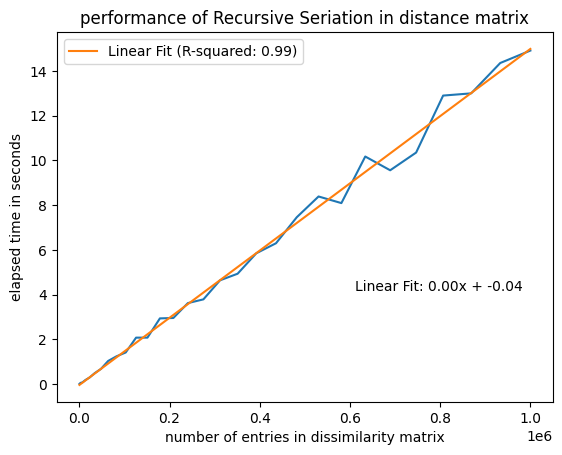

In [5]:
entries = sizes**2

plt.plot(entries, times)

# Linear fit
linear_coeffs = np.polyfit(entries, times, deg=1)
linear_fit = np.poly1d(linear_coeffs)
linear_predictions = linear_fit(entries)
linear_r_squared = 1 - (np.sum((times - linear_predictions) ** 2) / np.sum((times - np.mean(times)) ** 2))
plt.plot(entries, linear_fit(entries),label=f'Linear Fit (R-squared: {linear_r_squared:.2f})')

plt.title("performance of Recursive Seriation in distance matrix")
plt.ylabel("elapsed time in seconds")
plt.xlabel("number of entries in dissimilarity matrix")

# Legend
plt.legend(loc='upper left')
linear_eq = f'Linear Fit: {linear_coeffs[0]:.2f}x + {linear_coeffs[1]:.2f}'
plt.text(0.6, 0.3, linear_eq, transform=plt.gca().transAxes, fontsize=10)



Text(0.6, 0.25, 'Quadratic Fit: 0.00x^2 + -0.00x + 0.06')

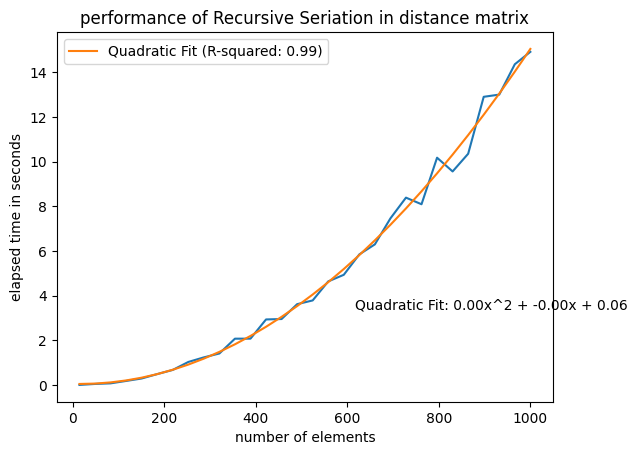

In [6]:
plt.plot(sizes, times)

# Quadratic fit
quadratic_coeffs = np.polyfit(sizes, times, deg=2)
quadratic_fit = np.poly1d(quadratic_coeffs)
quadratic_predictions = quadratic_fit(sizes)
quadratic_r_squared = 1 - (np.sum((times - quadratic_predictions) ** 2) / np.sum((times - np.mean(times)) ** 2))
plt.plot(sizes, quadratic_fit(sizes), label=f'Quadratic Fit (R-squared: {quadratic_r_squared:.2f})')


plt.title("performance of Recursive Seriation in distance matrix")
plt.ylabel("elapsed time in seconds")
plt.xlabel("number of elements")

# Legend
plt.legend(loc='upper left')
quadratic_eq = f'Quadratic Fit: {quadratic_coeffs[0]:.2f}x^2 + {quadratic_coeffs[1]:.2f}x + {quadratic_coeffs[2]:.2f}'
plt.text(0.6, 0.25, quadratic_eq, transform=plt.gca().transAxes, fontsize=10)
